# Contrast 1 (sentences)

In [137]:
import pandas as pd

df_participants = pd.read_csv("participants.tsv", sep="\t")
df_participants.to_csv("participants.csv", index=False)


In [138]:
import pandas as pd

participants = pd.read_csv("participants.csv")
roi = pd.read_csv(
    "roi_activation.csv",
    header=None,
    names=["participant_id", "roi_activation"]
)

merged = participants.merge(
    roi,
    on="participant_id",
    how="inner"
)

merged.to_csv("merged_data.csv", index=False)

print(merged.head())


  participant_id  age     sex   iq group  psyrats  roi_activation
0         sub-01   47    male   81    HC      NaN       22.050471
1         sub-02   36    male  104    HC      NaN        3.310809
2         sub-03   43    male  108    HC      NaN       -1.726863
3         sub-04   25    male  106    HC      NaN       40.269815
4         sub-05   52  female  102    HC      NaN       13.873823


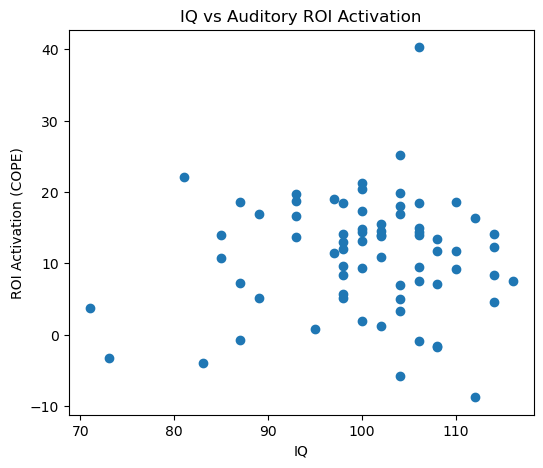

In [139]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.scatter(merged["iq"], merged["roi_activation"])
plt.xlabel("IQ")
plt.ylabel("ROI Activation (COPE)")
plt.title("IQ vs Auditory ROI Activation")
plt.show()


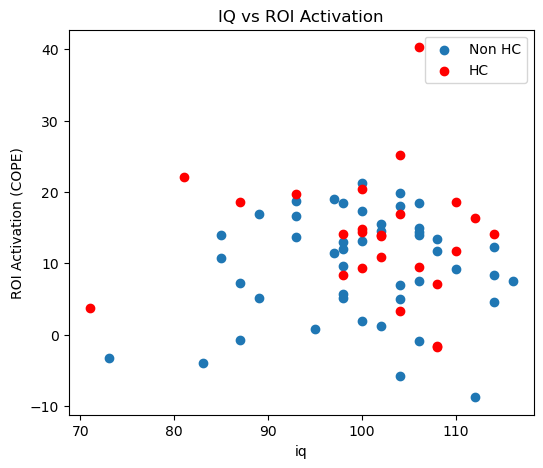

In [140]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))

# Non HC
plt.scatter(
    merged.loc[merged["group"] != "HC", "iq"],
    merged.loc[merged["group"] != "HC", "roi_activation"],
    label="Non HC"
)

# HC in red
plt.scatter(
    merged.loc[merged["group"] == "HC", "iq"],
    merged.loc[merged["group"] == "HC", "roi_activation"],
    color="red",
    label="HC"
)

plt.xlabel("iq")
plt.ylabel("ROI Activation (COPE)")
plt.title("IQ vs ROI Activation")
plt.legend()
plt.show()


In [141]:
import numpy as np

# make sure both columns are numeric
merged["iq"] = pd.to_numeric(merged["iq"], errors="coerce")
merged["roi_activation"] = pd.to_numeric(merged["roi_activation"], errors="coerce")

# drop rows with NaN or inf
clean = merged.replace([np.inf, -np.inf], np.nan).dropna(subset=["iq", "roi_activation"])

# optional sanity checks
print(clean[["iq", "roi_activation"]].describe())
print("rows:", len(clean), "unique iq:", clean["iq"].nunique())

x = clean["iq"].to_numpy()
y = clean["roi_activation"].to_numpy()

m, b = np.polyfit(x, y, 1)


               iq  roi_activation
count   71.000000       71.000000
mean   100.281690       11.108476
std      9.313865        8.125640
min     71.000000       -8.781331
25%     97.500000        6.330129
50%    102.000000       12.236006
75%    106.000000       16.511662
max    116.000000       40.269815
rows: 71 unique iq: 20


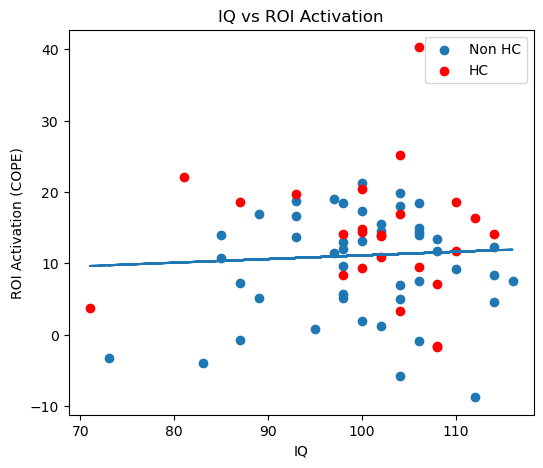

In [142]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))

plt.scatter(clean.loc[clean["group"] != "HC", "iq"],
            clean.loc[clean["group"] != "HC", "roi_activation"],
            label="Non HC")

plt.scatter(clean.loc[clean["group"] == "HC", "iq"],
            clean.loc[clean["group"] == "HC", "roi_activation"],
            color="red",
            label="HC")

plt.plot(x, m*x + b)

plt.xlabel("IQ")
plt.ylabel("ROI Activation (COPE)")
plt.title("IQ vs ROI Activation")
plt.legend()
plt.show()


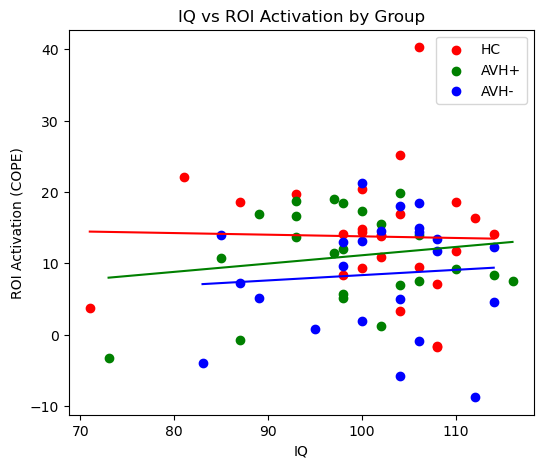

In [143]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6, 5))

groups = {
    "HC": "red",
    "AVH+": "green",
    "AVH-": "blue"
}

for g, color in groups.items():
    subset = clean[clean["group"] == g]

    # scatter
    plt.scatter(
        subset["iq"],
        subset["roi_activation"],
        label=g,
        color=color
    )

    # regression line (only if enough points)
    if len(subset) >= 2:
        x = subset["iq"].to_numpy()
        y = subset["roi_activation"].to_numpy()

        m, b = np.polyfit(x, y, 1)
        xs = np.linspace(x.min(), x.max(), 100)
        plt.plot(xs, m*xs + b, color=color)

plt.xlabel("IQ")
plt.ylabel("ROI Activation (COPE)")
plt.title("IQ vs ROI Activation by Group")
plt.legend()
plt.show()


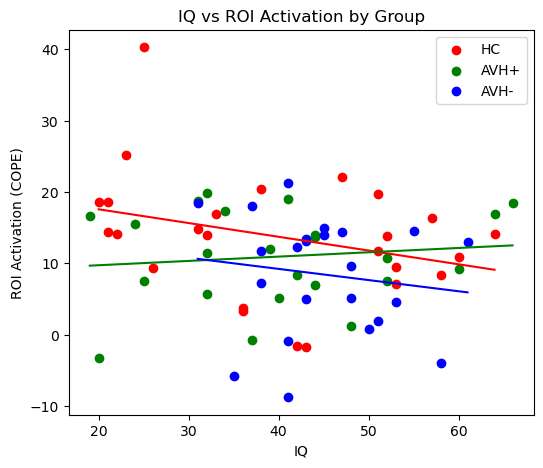

In [144]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6, 5))

groups = {
    "HC": "red",
    "AVH+": "green",
    "AVH-": "blue"
}

for g, color in groups.items():
    subset = clean[clean["group"] == g]

    # scatter
    plt.scatter(
        subset["age"],
        subset["roi_activation"],
        label=g,
        color=color
    )

    # regression line (only if enough points)
    if len(subset) >= 2:
        x = subset["age"].to_numpy()
        y = subset["roi_activation"].to_numpy()

        m, b = np.polyfit(x, y, 1)
        xs = np.linspace(x.min(), x.max(), 100)
        plt.plot(xs, m*xs + b, color=color)

plt.xlabel("IQ")
plt.ylabel("ROI Activation (COPE)")
plt.title("IQ vs ROI Activation by Group")
plt.legend()
plt.show()


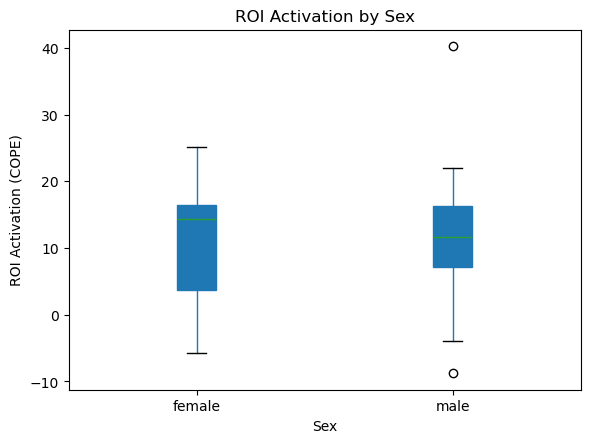

In [145]:
ax = clean.boxplot(
    column="roi_activation",
    by="sex",
    grid=False,
    patch_artist=True
)

for box in ax.artists:
    box.set_alpha(0.7)

plt.xlabel("Sex")
plt.ylabel("ROI Activation (COPE)")
plt.title("ROI Activation by Sex")
plt.suptitle("")
plt.show()


In [155]:
from scipy.stats import pearsonr

for g in ["HC", "AVH+", "AVH-"]:
    sub = merged[merged["group"] == g]

    if len(sub) >= 3 and sub["iq"].nunique() >= 2:
        r, p = pearsonr(sub["iq"], sub["roi_activation"])
        print(f"{g}: r = {r:.3f}, p = {p:.4g}, n = {len(sub)}")
    else:
        print(f"{g}: not enough valid data")


HC: r = -0.025, p = 0.9043, n = 25
AVH+: r = 0.170, p = 0.4376, n = 23
AVH-: r = 0.079, p = 0.721, n = 23


In [163]:
from scipy.stats import spearmanr
import pandas as pd
import numpy as np

# clean once
df1 = merged.copy()
df1["iq"] = pd.to_numeric(df1["iq"], errors="coerce")
df1["roi_activation"] = pd.to_numeric(df1["roi_activation"], errors="coerce")
df1 = df1.replace([np.inf, -np.inf], np.nan).dropna(subset=["iq", "roi_activation"])

for g in ["HC", "AVH+", "AVH-"]:
    sub = df1[df1["group"] == g]

    if len(sub) >= 3 and sub["iq"].nunique() >= 2:
        r, p = spearmanr(sub["iq"], sub["roi_activation"])
        print(f"{g}: Spearman r = {r:.3f}, p = {p:.4g}, n = {len(sub)}")
    else:
        print(f"{g}: not enough valid data (n = {len(sub)})")


HC: Spearman r = -0.162, p = 0.4393, n = 25
AVH+: Spearman r = -0.038, p = 0.8643, n = 23
AVH-: Spearman r = 0.059, p = 0.7888, n = 23


# Contrast 2 (Words)

In [146]:
import pandas as pd

participants = pd.read_csv("participants.csv")
roi2 = pd.read_csv(
    "roi_activation2.csv",
    header=None,
    names=["participant_id", "roi_activation"]
)

merged2 = participants.merge(
    roi2,
    on="participant_id",
    how="inner"
)

merged2.to_csv("merged_data2.csv", index=False)

print(merged2.head())


  participant_id  age     sex   iq group  psyrats  roi_activation
0         sub-01   47    male   81    HC      NaN       26.191861
1         sub-02   36    male  104    HC      NaN        5.665290
2         sub-03   43    male  108    HC      NaN      -14.352710
3         sub-04   25    male  106    HC      NaN       21.178689
4         sub-05   52  female  102    HC      NaN       10.578507


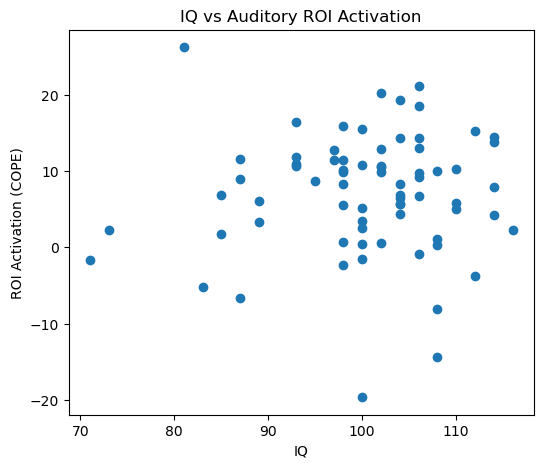

In [147]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.scatter(merged2["iq"], merged2["roi_activation"])
plt.xlabel("IQ")
plt.ylabel("ROI Activation (COPE)")
plt.title("IQ vs Auditory ROI Activation")
plt.show()


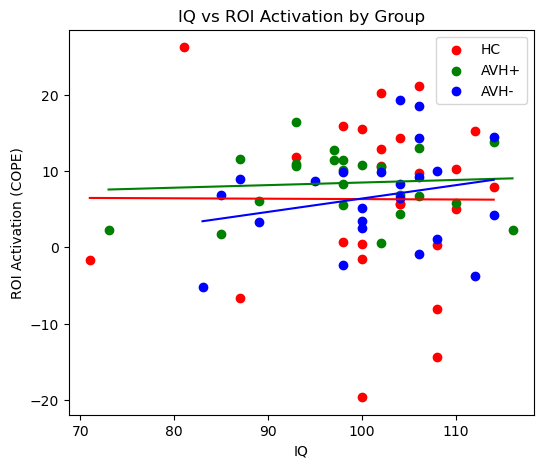

In [148]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(6, 5))

groups = {
    "HC": "red",
    "AVH+": "green",
    "AVH-": "blue"
}

for g, color in groups.items():
    subset = merged2[merged2["group"] == g].copy()

    # force numeric and drop bad rows
    subset["iq"] = pd.to_numeric(subset["iq"], errors="coerce")
    subset["roi_activation"] = pd.to_numeric(subset["roi_activation"], errors="coerce")
    subset = subset.replace([np.inf, -np.inf], np.nan).dropna(subset=["iq", "roi_activation"])

    # scatter (only valid points)
    plt.scatter(
        subset["iq"],
        subset["roi_activation"],
        label=g,
        color=color
    )

    # regression line (need at least 2 unique x values)
    if len(subset) >= 2 and subset["iq"].nunique() >= 2:
        x = subset["iq"].to_numpy()
        y = subset["roi_activation"].to_numpy()

        m, b = np.polyfit(x, y, 1)
        xs = np.linspace(x.min(), x.max(), 100)
        plt.plot(xs, m*xs + b, color=color)

plt.xlabel("IQ")
plt.ylabel("ROI Activation (COPE)")
plt.title("IQ vs ROI Activation by Group")
plt.legend()
plt.show()


In [154]:
from scipy.stats import pearsonr

for g in ["HC", "AVH+", "AVH-"]:
    sub = merged2[merged2["group"] == g]

    if len(sub) >= 3 and sub["iq"].nunique() >= 2:
        r, p = pearsonr(sub["iq"], sub["roi_activation"])
        print(f"{g}: r = {r:.3f}, p = {p:.4g}, n = {len(sub)}")
    else:
        print(f"{g}: not enough valid data")


HC: r = -0.005, p = 0.9827, n = 25
AVH+: r = 0.076, p = 0.7316, n = 23
AVH-: r = 0.234, p = 0.2823, n = 23


In [161]:
from scipy.stats import spearmanr
import pandas as pd
import numpy as np

# clean once
df2 = merged2.copy()
df2["iq"] = pd.to_numeric(df2["iq"], errors="coerce")
df2["roi_activation"] = pd.to_numeric(df2["roi_activation"], errors="coerce")
df2 = df2.replace([np.inf, -np.inf], np.nan).dropna(subset=["iq", "roi_activation"])

for g in ["HC", "AVH+", "AVH-"]:
    sub = df2[df2["group"] == g]

    if len(sub) >= 3 and sub["iq"].nunique() >= 2:
        r, p = spearmanr(sub["iq"], sub["roi_activation"])
        print(f"{g}: Spearman r = {r:.3f}, p = {p:.4g}, n = {len(sub)}")
    else:
        print(f"{g}: not enough valid data (n = {len(sub)})")


HC: Spearman r = -0.021, p = 0.9211, n = 25
AVH+: Spearman r = -0.067, p = 0.7613, n = 23
AVH-: Spearman r = 0.213, p = 0.329, n = 23


# Contrast 3 (Reversed)

In [149]:
import pandas as pd

participants = pd.read_csv("participants.csv")
roi3 = pd.read_csv(
    "roi_activation3.csv",
    header=None,
    names=["participant_id", "roi_activation"]
)

merged3 = participants.merge(
    roi3,
    on="participant_id",
    how="inner"
)

merged3.to_csv("merged_data3.csv", index=False)

print(merged3.head())

  participant_id  age     sex   iq group  psyrats  roi_activation
0         sub-01   47    male   81    HC      NaN       22.874010
1         sub-02   36    male  104    HC      NaN       -2.168245
2         sub-03   43    male  108    HC      NaN       -0.226370
3         sub-04   25    male  106    HC      NaN       15.028452
4         sub-05   52  female  102    HC      NaN        9.119040


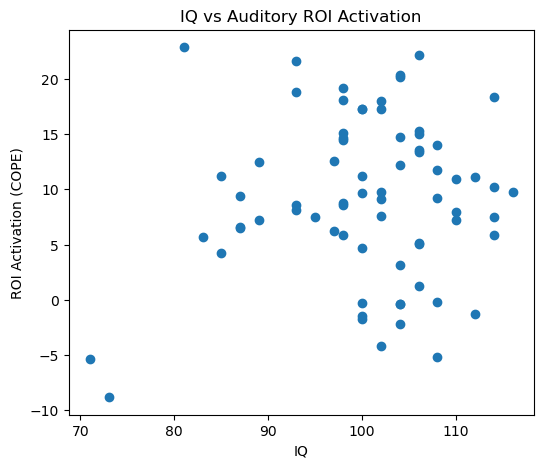

In [150]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.scatter(merged3["iq"], merged3["roi_activation"])
plt.xlabel("IQ")
plt.ylabel("ROI Activation (COPE)")
plt.title("IQ vs Auditory ROI Activation")
plt.show()


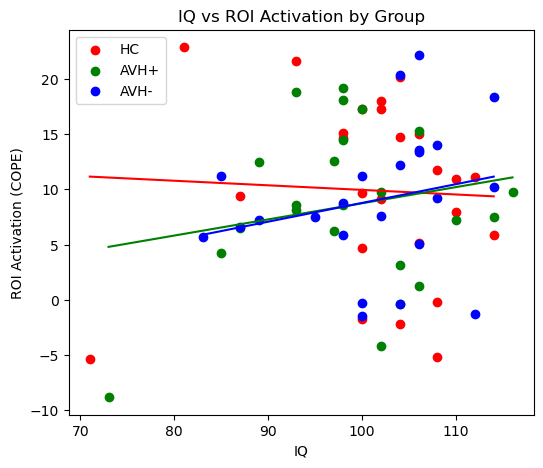

In [151]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(6, 5))

groups = {
    "HC": "red",
    "AVH+": "green",
    "AVH-": "blue"
}

for g, color in groups.items():
    subset = merged3[merged3["group"] == g].copy()

    # force numeric and drop bad rows
    subset["iq"] = pd.to_numeric(subset["iq"], errors="coerce")
    subset["roi_activation"] = pd.to_numeric(subset["roi_activation"], errors="coerce")
    subset = subset.replace([np.inf, -np.inf], np.nan).dropna(subset=["iq", "roi_activation"])

    # scatter (only valid points)
    plt.scatter(
        subset["iq"],
        subset["roi_activation"],
        label=g,
        color=color
    )

    # regression line (need at least 2 unique x values)
    if len(subset) >= 2 and subset["iq"].nunique() >= 2:
        x = subset["iq"].to_numpy()
        y = subset["roi_activation"].to_numpy()

        m, b = np.polyfit(x, y, 1)
        xs = np.linspace(x.min(), x.max(), 100)
        plt.plot(xs, m*xs + b, color=color)

plt.xlabel("IQ")
plt.ylabel("ROI Activation (COPE)")
plt.title("IQ vs ROI Activation by Group")
plt.legend()
plt.show()


In [153]:
from scipy.stats import pearsonr

for g in ["HC", "AVH+", "AVH-"]:
    sub = merged3[merged3["group"] == g]

    if len(sub) >= 3 and sub["iq"].nunique() >= 2:
        r, p = pearsonr(sub["iq"], sub["roi_activation"])
        print(f"{g}: r = {r:.3f}, p = {p:.4g}, n = {len(sub)}")
    else:
        print(f"{g}: not enough valid data")


HC: r = -0.049, p = 0.815, n = 25
AVH+: r = 0.194, p = 0.3759, n = 23
AVH-: r = 0.229, p = 0.2942, n = 23


In [162]:
from scipy.stats import spearmanr
import pandas as pd
import numpy as np

# clean once
df3 = merged3.copy()
df3["iq"] = pd.to_numeric(df3["iq"], errors="coerce")
df3["roi_activation"] = pd.to_numeric(df3["roi_activation"], errors="coerce")
df3 = df3.replace([np.inf, -np.inf], np.nan).dropna(subset=["iq", "roi_activation"])

for g in ["HC", "AVH+", "AVH-"]:
    sub = df3[df3["group"] == g]

    if len(sub) >= 3 and sub["iq"].nunique() >= 2:
        r, p = spearmanr(sub["iq"], sub["roi_activation"])
        print(f"{g}: Spearman r = {r:.3f}, p = {p:.4g}, n = {len(sub)}")
    else:
        print(f"{g}: not enough valid data (n = {len(sub)})")


HC: Spearman r = -0.237, p = 0.255, n = 25
AVH+: Spearman r = -0.017, p = 0.9391, n = 23
AVH-: Spearman r = 0.357, p = 0.09487, n = 23


In [169]:
from scipy.stats import kruskal

hc = df3.loc[df3["group"] == "HC", "roi_activation"]
avhp = df3.loc[df3["group"] == "AVH+", "roi_activation"]
avhm = df3.loc[df3["group"] == "AVH-", "roi_activation"]

H, p = kruskal(hc, avhp, avhm)
print("Kruskal Wallis H =", H, "p =", p)


Kruskal Wallis H = 0.5777179016125729 p = 0.7491178604214255


In [180]:
import pandas as pd
import numpy as np

heat_df = merged3[["iq", "roi_activation", "age", "sex"]].copy()

# encode sex numerically if needed
heat_df["sex"] = heat_df["sex"].map({
    "female": 0,
    "male": 1,
    "F": 0,
    "M": 1
})

# make sure numeric
heat_df = heat_df.apply(pd.to_numeric, errors="coerce")

# drop missing
heat_df = heat_df.dropna()


In [181]:
corr = heat_df.corr(method="spearman")
print(corr)


                      iq  roi_activation       age       sex
iq              1.000000        0.008380  0.082763  0.166470
roi_activation  0.008380        1.000000  0.032733  0.020936
age             0.082763        0.032733  1.000000 -0.087018
sex             0.166470        0.020936 -0.087018  1.000000


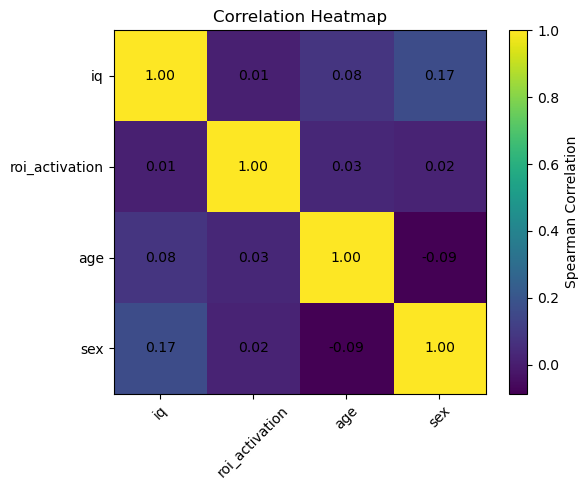

In [182]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))

plt.imshow(corr, aspect="auto")
plt.colorbar(label="Spearman Correlation")

plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)

# annotate values
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(
            j, i,
            f"{corr.iloc[i, j]:.2f}",
            ha="center",
            va="center",
            fontsize=10
        )

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


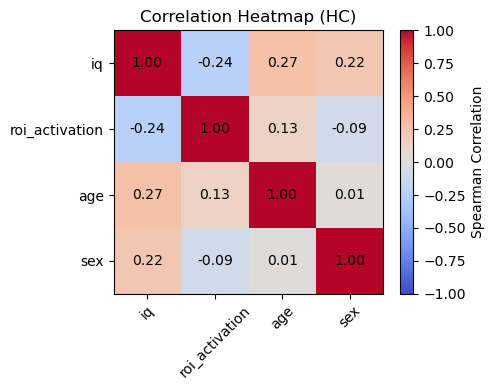

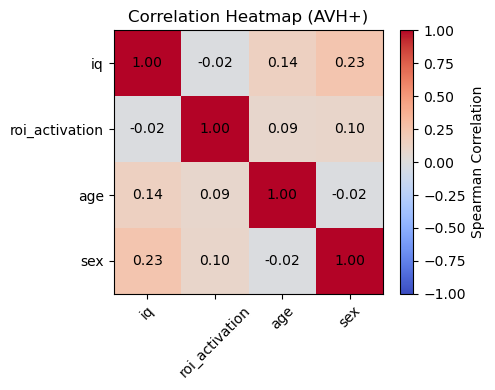

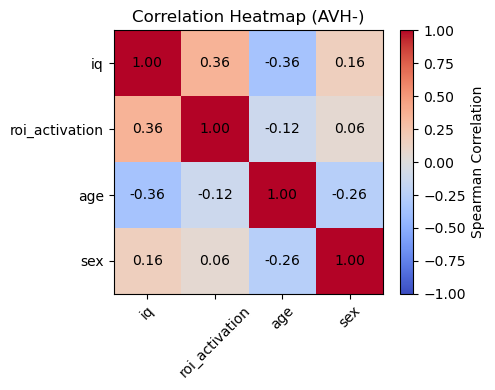

In [183]:
for g in ["HC", "AVH+", "AVH-"]:
    sub = heat_df[merged3["group"] == g]
    corr = sub.corr(method="spearman")

    plt.figure(figsize=(5, 4))
    plt.imshow(corr, aspect="auto", cmap="coolwarm", vmin=-1, vmax=1)
    plt.colorbar(label="Spearman Correlation")
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
    plt.yticks(range(len(corr.columns)), corr.columns)

    for i in range(len(corr.columns)):
        for j in range(len(corr.columns)):
            plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha="center", va="center")

    plt.title(f"Correlation Heatmap ({g})")
    plt.tight_layout()
    plt.show()


# Contrast 1 (Heschl, Sentences)

In [184]:
import pandas as pd

participants = pd.read_csv("participants.csv")
roi1_hes = pd.read_csv(
    "roi_activation_heschl1.csv",
    header=None,
    names=["participant_id", "roi_activation"]
)

merged1_hes = participants.merge(
    roi1_hes,
    on="participant_id",
    how="inner"
)

merged1_hes.to_csv("merged_data1_hes.csv", index=False)

print(merged1_hes.head())

  participant_id  age     sex   iq group  psyrats  roi_activation
0         sub-01   47    male   81    HC      NaN       45.996813
1         sub-02   36    male  104    HC      NaN       24.165814
2         sub-03   43    male  108    HC      NaN       23.644578
3         sub-04   25    male  106    HC      NaN       91.881671
4         sub-05   52  female  102    HC      NaN       23.279709


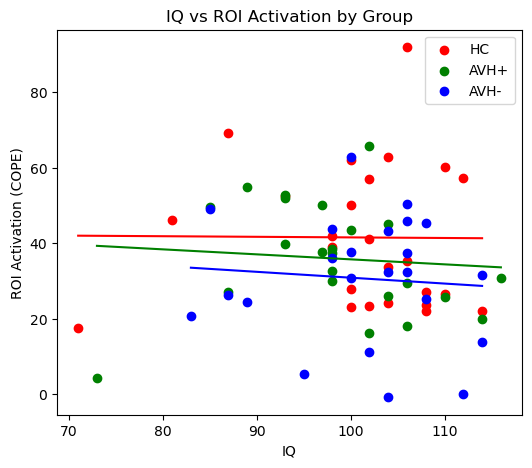

In [185]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(6, 5))

groups = {
    "HC": "red",
    "AVH+": "green",
    "AVH-": "blue"
}

for g, color in groups.items():
    subset = merged1_hes[merged1_hes["group"] == g].copy()

    # force numeric and drop bad rows
    subset["iq"] = pd.to_numeric(subset["iq"], errors="coerce")
    subset["roi_activation"] = pd.to_numeric(subset["roi_activation"], errors="coerce")
    subset = subset.replace([np.inf, -np.inf], np.nan).dropna(subset=["iq", "roi_activation"])

    # scatter (only valid points)
    plt.scatter(
        subset["iq"],
        subset["roi_activation"],
        label=g,
        color=color
    )

    # regression line (need at least 2 unique x values)
    if len(subset) >= 2 and subset["iq"].nunique() >= 2:
        x = subset["iq"].to_numpy()
        y = subset["roi_activation"].to_numpy()

        m, b = np.polyfit(x, y, 1)
        xs = np.linspace(x.min(), x.max(), 100)
        plt.plot(xs, m*xs + b, color=color)

plt.xlabel("IQ")
plt.ylabel("ROI Activation (COPE)")
plt.title("IQ vs ROI Activation by Group")
plt.legend()
plt.show()


In [190]:
from scipy.stats import pearsonr

for g in ["HC", "AVH+", "AVH-"]:
    sub = merged1_hes[merged1_hes["group"] == g]

    if len(sub) >= 3 and sub["iq"].nunique() >= 2:
        r, p = pearsonr(sub["iq"], sub["roi_activation"])
        print(f"{g}: r = {r:.3f}, p = {p:.4g}, n = {len(sub)}")
    else:
        print(f"{g}: not enough valid data")


HC: r = -0.008, p = 0.9696, n = 25
AVH+: r = -0.087, p = 0.6933, n = 23
AVH-: r = -0.081, p = 0.7128, n = 23


# Contrast 2 (Words,Heschl)

In [186]:
import pandas as pd

participants = pd.read_csv("participants.csv")
roi2_hes = pd.read_csv(
    "roi_activation_heschl2.csv",
    header=None,
    names=["participant_id", "roi_activation"]
)

merged2_hes = participants.merge(
    roi2_hes,
    on="participant_id",
    how="inner"
)

merged2_hes.to_csv("merged_data2_hes.csv", index=False)

print(merged2_hes.head())

  participant_id  age     sex   iq group  psyrats  roi_activation
0         sub-01   47    male   81    HC      NaN       54.834256
1         sub-02   36    male  104    HC      NaN       18.691651
2         sub-03   43    male  108    HC      NaN       -1.620042
3         sub-04   25    male  106    HC      NaN       51.263794
4         sub-05   52  female  102    HC      NaN       23.654143


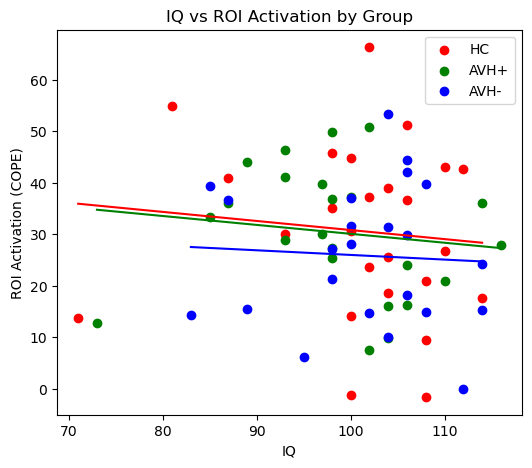

In [187]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(6, 5))

groups = {
    "HC": "red",
    "AVH+": "green",
    "AVH-": "blue"
}

for g, color in groups.items():
    subset = merged2_hes[merged2_hes["group"] == g].copy()

    # force numeric and drop bad rows
    subset["iq"] = pd.to_numeric(subset["iq"], errors="coerce")
    subset["roi_activation"] = pd.to_numeric(subset["roi_activation"], errors="coerce")
    subset = subset.replace([np.inf, -np.inf], np.nan).dropna(subset=["iq", "roi_activation"])

    # scatter (only valid points)
    plt.scatter(
        subset["iq"],
        subset["roi_activation"],
        label=g,
        color=color
    )

    # regression line (need at least 2 unique x values)
    if len(subset) >= 2 and subset["iq"].nunique() >= 2:
        x = subset["iq"].to_numpy()
        y = subset["roi_activation"].to_numpy()

        m, b = np.polyfit(x, y, 1)
        xs = np.linspace(x.min(), x.max(), 100)
        plt.plot(xs, m*xs + b, color=color)

plt.xlabel("IQ")
plt.ylabel("ROI Activation (COPE)")
plt.title("IQ vs ROI Activation by Group")
plt.legend()
plt.show()


In [191]:
from scipy.stats import pearsonr

for g in ["HC", "AVH+", "AVH-"]:
    sub = merged2_hes[merged2_hes["group"] == g]

    if len(sub) >= 3 and sub["iq"].nunique() >= 2:
        r, p = pearsonr(sub["iq"], sub["roi_activation"])
        print(f"{g}: r = {r:.3f}, p = {p:.4g}, n = {len(sub)}")
    else:
        print(f"{g}: not enough valid data")


HC: r = -0.101, p = 0.6303, n = 25
AVH+: r = -0.133, p = 0.5448, n = 23
AVH-: r = -0.058, p = 0.793, n = 23


# Contrast 3 (Reversed,Heschl)

In [188]:
import pandas as pd

participants = pd.read_csv("participants.csv")
roi3_hes = pd.read_csv(
    "roi_activation_heschl3.csv",
    header=None,
    names=["participant_id", "roi_activation"]
)

merged3_hes = participants.merge(
    roi3_hes,
    on="participant_id",
    how="inner"
)

merged3_hes.to_csv("merged_data3_hes.csv", index=False)

print(merged3_hes.head())

  participant_id  age     sex   iq group  psyrats  roi_activation
0         sub-01   47    male   81    HC      NaN       62.243129
1         sub-02   36    male  104    HC      NaN        8.206631
2         sub-03   43    male  108    HC      NaN       17.939142
3         sub-04   25    male  106    HC      NaN       57.944276
4         sub-05   52  female  102    HC      NaN       18.040911


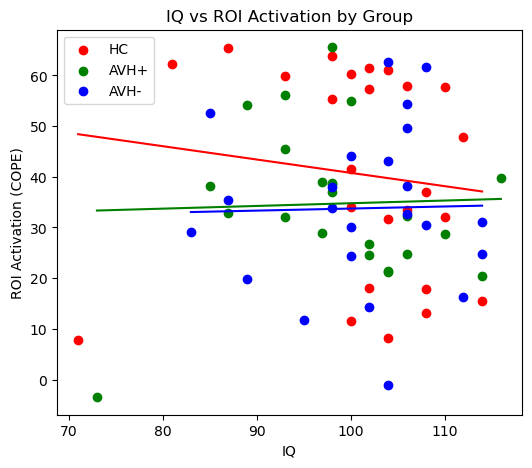

In [189]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(6, 5))

groups = {
    "HC": "red",
    "AVH+": "green",
    "AVH-": "blue"
}

for g, color in groups.items():
    subset = merged3_hes[merged3_hes["group"] == g].copy()

    # force numeric and drop bad rows
    subset["iq"] = pd.to_numeric(subset["iq"], errors="coerce")
    subset["roi_activation"] = pd.to_numeric(subset["roi_activation"], errors="coerce")
    subset = subset.replace([np.inf, -np.inf], np.nan).dropna(subset=["iq", "roi_activation"])

    # scatter (only valid points)
    plt.scatter(
        subset["iq"],
        subset["roi_activation"],
        label=g,
        color=color
    )

    # regression line (need at least 2 unique x values)
    if len(subset) >= 2 and subset["iq"].nunique() >= 2:
        x = subset["iq"].to_numpy()
        y = subset["roi_activation"].to_numpy()

        m, b = np.polyfit(x, y, 1)
        xs = np.linspace(x.min(), x.max(), 100)
        plt.plot(xs, m*xs + b, color=color)

plt.xlabel("IQ")
plt.ylabel("ROI Activation (COPE)")
plt.title("IQ vs ROI Activation by Group")
plt.legend()
plt.show()


In [192]:
from scipy.stats import pearsonr

for g in ["HC", "AVH+", "AVH-"]:
    sub = merged3_hes[merged3_hes["group"] == g]

    if len(sub) >= 3 and sub["iq"].nunique() >= 2:
        r, p = pearsonr(sub["iq"], sub["roi_activation"])
        print(f"{g}: r = {r:.3f}, p = {p:.4g}, n = {len(sub)}")
    else:
        print(f"{g}: not enough valid data")


HC: r = -0.125, p = 0.552, n = 25
AVH+: r = 0.035, p = 0.8749, n = 23
AVH-: r = 0.022, p = 0.9206, n = 23


# Contrast 1 (Occipital, Words)

In [193]:
import pandas as pd

participants = pd.read_csv("participants.csv")
roi1_occ = pd.read_csv(
    "roi_activation_occipital1.csv",
    header=None,
    names=["participant_id", "roi_activation"]
)

merged1_occ = participants.merge(
    roi1_occ,
    on="participant_id",
    how="inner"
)

merged1_occ.to_csv("merged_data1_occ.csv", index=False)

print(merged1_occ.head())

  participant_id  age     sex   iq group  psyrats  roi_activation
0         sub-01   47    male   81    HC      NaN        4.601756
1         sub-02   36    male  104    HC      NaN      -18.527163
2         sub-03   43    male  108    HC      NaN      -24.658008
3         sub-04   25    male  106    HC      NaN       26.172823
4         sub-05   52  female  102    HC      NaN       -0.029503


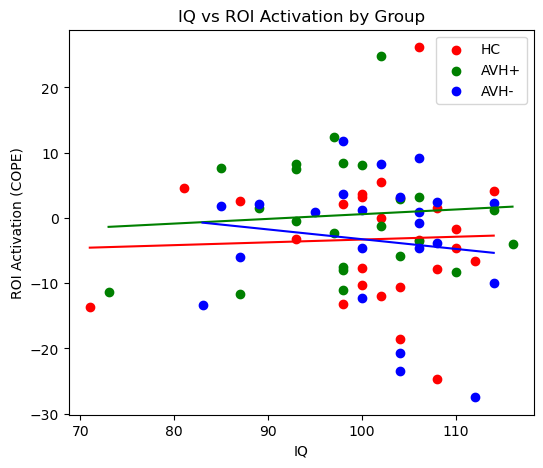

In [196]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(6, 5))

groups = {
    "HC": "red",
    "AVH+": "green",
    "AVH-": "blue"
}

for g, color in groups.items():
    subset = merged1_occ[merged1_occ["group"] == g].copy()

    # force numeric and drop bad rows
    subset["iq"] = pd.to_numeric(subset["iq"], errors="coerce")
    subset["roi_activation"] = pd.to_numeric(subset["roi_activation"], errors="coerce")
    subset = subset.replace([np.inf, -np.inf], np.nan).dropna(subset=["iq", "roi_activation"])

    # scatter (only valid points)
    plt.scatter(
        subset["iq"],
        subset["roi_activation"],
        label=g,
        color=color
    )

    # regression line (need at least 2 unique x values)
    if len(subset) >= 2 and subset["iq"].nunique() >= 2:
        x = subset["iq"].to_numpy()
        y = subset["roi_activation"].to_numpy()

        m, b = np.polyfit(x, y, 1)
        xs = np.linspace(x.min(), x.max(), 100)
        plt.plot(xs, m*xs + b, color=color)

plt.xlabel("IQ")
plt.ylabel("ROI Activation (COPE)")
plt.title("IQ vs ROI Activation by Group")
plt.legend()
plt.show()


In [197]:
from scipy.stats import pearsonr

for g in ["HC", "AVH+", "AVH-"]:
    sub = merged1_occ[merged1_occ["group"] == g]

    if len(sub) >= 3 and sub["iq"].nunique() >= 2:
        r, p = pearsonr(sub["iq"], sub["roi_activation"])
        print(f"{g}: r = {r:.3f}, p = {p:.4g}, n = {len(sub)}")
    else:
        print(f"{g}: not enough valid data")


HC: r = 0.042, p = 0.8437, n = 25
AVH+: r = 0.077, p = 0.7253, n = 23
AVH-: r = -0.126, p = 0.5654, n = 23


# Contrast 2 (Occipital, Sentences)

In [198]:
import pandas as pd

participants = pd.read_csv("participants.csv")
roi2_occ = pd.read_csv(
    "roi_activation_occipital2.csv",
    header=None,
    names=["participant_id", "roi_activation"]
)

merged2_occ = participants.merge(
    roi2_occ,
    on="participant_id",
    how="inner"
)

merged2_occ.to_csv("merged_data2_occ.csv", index=False)

print(merged2_occ.head())

  participant_id  age     sex   iq group  psyrats  roi_activation
0         sub-01   47    male   81    HC      NaN       16.951146
1         sub-02   36    male  104    HC      NaN      -20.916457
2         sub-03   43    male  108    HC      NaN      -38.007631
3         sub-04   25    male  106    HC      NaN       10.597668
4         sub-05   52  female  102    HC      NaN        2.123479


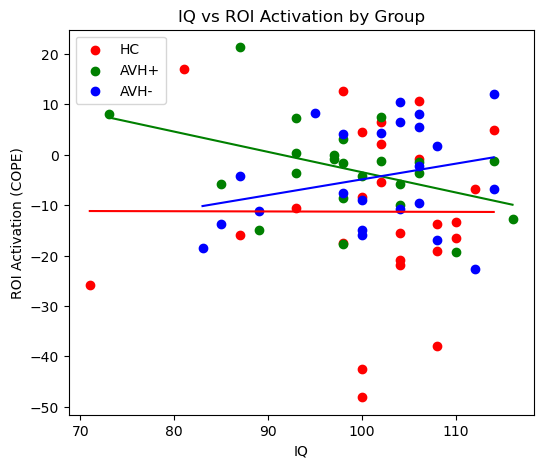

In [199]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(6, 5))

groups = {
    "HC": "red",
    "AVH+": "green",
    "AVH-": "blue"
}

for g, color in groups.items():
    subset = merged2_occ[merged2_occ["group"] == g].copy()

    # force numeric and drop bad rows
    subset["iq"] = pd.to_numeric(subset["iq"], errors="coerce")
    subset["roi_activation"] = pd.to_numeric(subset["roi_activation"], errors="coerce")
    subset = subset.replace([np.inf, -np.inf], np.nan).dropna(subset=["iq", "roi_activation"])

    # scatter (only valid points)
    plt.scatter(
        subset["iq"],
        subset["roi_activation"],
        label=g,
        color=color
    )

    # regression line (need at least 2 unique x values)
    if len(subset) >= 2 and subset["iq"].nunique() >= 2:
        x = subset["iq"].to_numpy()
        y = subset["roi_activation"].to_numpy()

        m, b = np.polyfit(x, y, 1)
        xs = np.linspace(x.min(), x.max(), 100)
        plt.plot(xs, m*xs + b, color=color)

plt.xlabel("IQ")
plt.ylabel("ROI Activation (COPE)")
plt.title("IQ vs ROI Activation by Group")
plt.legend()
plt.show()


In [200]:
from scipy.stats import pearsonr

for g in ["HC", "AVH+", "AVH-"]:
    sub = merged2_occ[merged2_occ["group"] == g]

    if len(sub) >= 3 and sub["iq"].nunique() >= 2:
        r, p = pearsonr(sub["iq"], sub["roi_activation"])
        print(f"{g}: r = {r:.3f}, p = {p:.4g}, n = {len(sub)}")
    else:
        print(f"{g}: not enough valid data")


HC: r = -0.002, p = 0.9906, n = 25
AVH+: r = -0.425, p = 0.04309, n = 23
AVH-: r = 0.260, p = 0.2311, n = 23


# Contrast 3 (Occipital, Reversed)

In [201]:
import pandas as pd

participants = pd.read_csv("participants.csv")
roi3_occ = pd.read_csv(
    "roi_activation_occipital3.csv",
    header=None,
    names=["participant_id", "roi_activation"]
)

merged3_occ = participants.merge(
    roi3_occ,
    on="participant_id",
    how="inner"
)

merged3_occ.to_csv("merged_data3_occ.csv", index=False)

print(merged2_occ.head())

  participant_id  age     sex   iq group  psyrats  roi_activation
0         sub-01   47    male   81    HC      NaN       16.951146
1         sub-02   36    male  104    HC      NaN      -20.916457
2         sub-03   43    male  108    HC      NaN      -38.007631
3         sub-04   25    male  106    HC      NaN       10.597668
4         sub-05   52  female  102    HC      NaN        2.123479


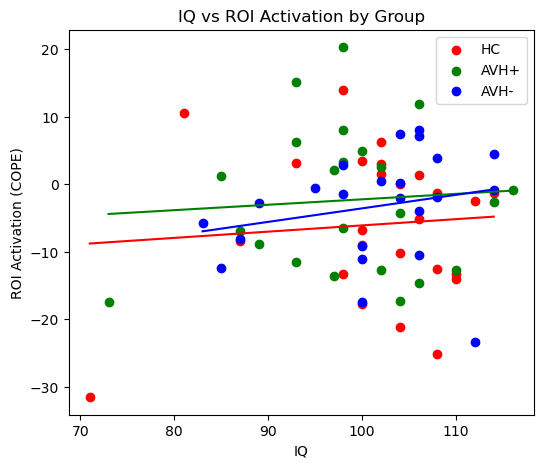

In [202]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(6, 5))

groups = {
    "HC": "red",
    "AVH+": "green",
    "AVH-": "blue"
}

for g, color in groups.items():
    subset = merged3_occ[merged3_occ["group"] == g].copy()

    # force numeric and drop bad rows
    subset["iq"] = pd.to_numeric(subset["iq"], errors="coerce")
    subset["roi_activation"] = pd.to_numeric(subset["roi_activation"], errors="coerce")
    subset = subset.replace([np.inf, -np.inf], np.nan).dropna(subset=["iq", "roi_activation"])

    # scatter (only valid points)
    plt.scatter(
        subset["iq"],
        subset["roi_activation"],
        label=g,
        color=color
    )

    # regression line (need at least 2 unique x values)
    if len(subset) >= 2 and subset["iq"].nunique() >= 2:
        x = subset["iq"].to_numpy()
        y = subset["roi_activation"].to_numpy()

        m, b = np.polyfit(x, y, 1)
        xs = np.linspace(x.min(), x.max(), 100)
        plt.plot(xs, m*xs + b, color=color)

plt.xlabel("IQ")
plt.ylabel("ROI Activation (COPE)")
plt.title("IQ vs ROI Activation by Group")
plt.legend()
plt.show()


In [203]:
from scipy.stats import pearsonr

for g in ["HC", "AVH+", "AVH-"]:
    sub = merged3_occ[merged3_occ["group"] == g]

    if len(sub) >= 3 and sub["iq"].nunique() >= 2:
        r, p = pearsonr(sub["iq"], sub["roi_activation"])
        print(f"{g}: r = {r:.3f}, p = {p:.4g}, n = {len(sub)}")
    else:
        print(f"{g}: not enough valid data")


HC: r = 0.082, p = 0.6985, n = 25
AVH+: r = 0.073, p = 0.7401, n = 23
AVH-: r = 0.218, p = 0.3187, n = 23


In [223]:
from scipy.stats import spearmanr
import pandas as pd
import numpy as np

# clean once
df1 = merged3_occ.copy()
df1["iq"] = pd.to_numeric(df1["iq"], errors="coerce")
df1["roi_activation"] = pd.to_numeric(df1["roi_activation"], errors="coerce")
df1 = df1.replace([np.inf, -np.inf], np.nan).dropna(subset=["iq", "roi_activation"])

for g in ["HC", "AVH+", "AVH-"]:
    sub = df1[df1["group"] == g]

    if len(sub) >= 3 and sub["iq"].nunique() >= 2:
        r, p = spearmanr(sub["iq"], sub["roi_activation"])
        print(f"{g}: Spearman r = {r:.3f}, p = {p:.4g}, n = {len(sub)}")
    else:
        print(f"{g}: not enough valid data (n = {len(sub)})")


HC: Spearman r = -0.209, p = 0.3168, n = 25
AVH+: Spearman r = -0.007, p = 0.9731, n = 23
AVH-: Spearman r = 0.317, p = 0.1407, n = 23


# Contrast 1 (Audit, Words)

In [207]:
import pandas as pd

participants = pd.read_csv("participants.csv")
roi1_audit = pd.read_csv(
    "roi_activation_audit1.csv",
    header=None,
    names=["participant_id", "roi_activation"]
)

merged1_audit = participants.merge(
    roi1_audit,
    on="participant_id",
    how="inner"
)

merged1_audit.to_csv("merged_data1_audit.csv", index=False)

print(merged1_audit.head())

  participant_id  age     sex   iq group  psyrats  roi_activation
0         sub-01   47    male   81    HC      NaN       35.200545
1         sub-02   36    male  104    HC      NaN       19.033702
2         sub-03   43    male  108    HC      NaN       18.614515
3         sub-04   25    male  106    HC      NaN       80.182524
4         sub-05   52  female  102    HC      NaN       18.092131


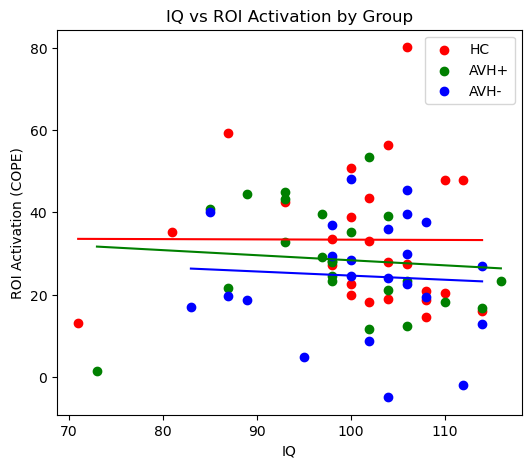

In [208]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(6, 5))

groups = {
    "HC": "red",
    "AVH+": "green",
    "AVH-": "blue"
}

for g, color in groups.items():
    subset = merged1_audit[merged1_audit["group"] == g].copy()

    # force numeric and drop bad rows
    subset["iq"] = pd.to_numeric(subset["iq"], errors="coerce")
    subset["roi_activation"] = pd.to_numeric(subset["roi_activation"], errors="coerce")
    subset = subset.replace([np.inf, -np.inf], np.nan).dropna(subset=["iq", "roi_activation"])

    # scatter (only valid points)
    plt.scatter(
        subset["iq"],
        subset["roi_activation"],
        label=g,
        color=color
    )

    # regression line (need at least 2 unique x values)
    if len(subset) >= 2 and subset["iq"].nunique() >= 2:
        x = subset["iq"].to_numpy()
        y = subset["roi_activation"].to_numpy()

        m, b = np.polyfit(x, y, 1)
        xs = np.linspace(x.min(), x.max(), 100)
        plt.plot(xs, m*xs + b, color=color)

plt.xlabel("IQ")
plt.ylabel("ROI Activation (COPE)")
plt.title("IQ vs ROI Activation by Group")
plt.legend()
plt.show()


In [209]:
from scipy.stats import pearsonr

for g in ["HC", "AVH+", "AVH-"]:
    sub = merged1_audit[merged1_audit["group"] == g]

    if len(sub) >= 3 and sub["iq"].nunique() >= 2:
        r, p = pearsonr(sub["iq"], sub["roi_activation"])
        print(f"{g}: r = {r:.3f}, p = {p:.4g}, n = {len(sub)}")
    else:
        print(f"{g}: not enough valid data")


HC: r = -0.004, p = 0.9853, n = 25
AVH+: r = -0.093, p = 0.672, n = 23
AVH-: r = -0.061, p = 0.7819, n = 23


In [222]:
from scipy.stats import spearmanr
import pandas as pd
import numpy as np

# clean once
df1 = merged1_audit.copy()
df1["iq"] = pd.to_numeric(df1["iq"], errors="coerce")
df1["roi_activation"] = pd.to_numeric(df1["roi_activation"], errors="coerce")
df1 = df1.replace([np.inf, -np.inf], np.nan).dropna(subset=["iq", "roi_activation"])

for g in ["HC", "AVH+", "AVH-"]:
    sub = df1[df1["group"] == g]

    if len(sub) >= 3 and sub["iq"].nunique() >= 2:
        r, p = spearmanr(sub["iq"], sub["roi_activation"])
        print(f"{g}: Spearman r = {r:.3f}, p = {p:.4g}, n = {len(sub)}")
    else:
        print(f"{g}: not enough valid data (n = {len(sub)})")


HC: Spearman r = -0.139, p = 0.5071, n = 25
AVH+: Spearman r = -0.389, p = 0.0665, n = 23
AVH-: Spearman r = -0.022, p = 0.9212, n = 23


# Contrast 2 (Audit, Sentences)

In [214]:
import pandas as pd

participants = pd.read_csv("participants.csv")
roi2_audit = pd.read_csv(
    "roi_activation_audit2.csv",
    header=None,
    names=["participant_id", "roi_activation"]
)

merged2_audit = participants.merge(
    roi2_audit,
    on="participant_id",
    how="inner"
)

merged2_audit.to_csv("merged_data2_audit.csv", index=False)

print(merged2_audit.head())

  participant_id  age     sex   iq group  psyrats  roi_activation
0         sub-01   47    male   81    HC      NaN       43.615163
1         sub-02   36    male  104    HC      NaN       16.024401
2         sub-03   43    male  108    HC      NaN       -3.864493
3         sub-04   25    male  106    HC      NaN       40.142956
4         sub-05   52  female  102    HC      NaN       18.517782


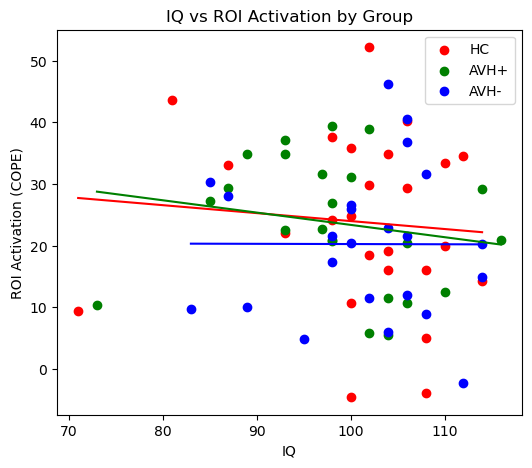

In [215]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(6, 5))

groups = {
    "HC": "red",
    "AVH+": "green",
    "AVH-": "blue"
}

for g, color in groups.items():
    subset = merged2_audit[merged2_audit["group"] == g].copy()

    # force numeric and drop bad rows
    subset["iq"] = pd.to_numeric(subset["iq"], errors="coerce")
    subset["roi_activation"] = pd.to_numeric(subset["roi_activation"], errors="coerce")
    subset = subset.replace([np.inf, -np.inf], np.nan).dropna(subset=["iq", "roi_activation"])

    # scatter (only valid points)
    plt.scatter(
        subset["iq"],
        subset["roi_activation"],
        label=g,
        color=color
    )

    # regression line (need at least 2 unique x values)
    if len(subset) >= 2 and subset["iq"].nunique() >= 2:
        x = subset["iq"].to_numpy()
        y = subset["roi_activation"].to_numpy()

        m, b = np.polyfit(x, y, 1)
        xs = np.linspace(x.min(), x.max(), 100)
        plt.plot(xs, m*xs + b, color=color)

plt.xlabel("IQ")
plt.ylabel("ROI Activation (COPE)")
plt.title("IQ vs ROI Activation by Group")
plt.legend()
plt.show()


In [216]:
from scipy.stats import pearsonr

for g in ["HC", "AVH+", "AVH-"]:
    sub = merged2_audit[merged2_audit["group"] == g]

    if len(sub) >= 3 and sub["iq"].nunique() >= 2:
        r, p = pearsonr(sub["iq"], sub["roi_activation"])
        print(f"{g}: r = {r:.3f}, p = {p:.4g}, n = {len(sub)}")
    else:
        print(f"{g}: not enough valid data")


HC: r = -0.088, p = 0.676, n = 25
AVH+: r = -0.183, p = 0.404, n = 23
AVH-: r = -0.003, p = 0.9906, n = 23


In [221]:
from scipy.stats import spearmanr
import pandas as pd
import numpy as np

# clean once
df1 = merged2_audit.copy()
df1["iq"] = pd.to_numeric(df1["iq"], errors="coerce")
df1["roi_activation"] = pd.to_numeric(df1["roi_activation"], errors="coerce")
df1 = df1.replace([np.inf, -np.inf], np.nan).dropna(subset=["iq", "roi_activation"])

for g in ["HC", "AVH+", "AVH-"]:
    sub = df1[df1["group"] == g]

    if len(sub) >= 3 and sub["iq"].nunique() >= 2:
        r, p = spearmanr(sub["iq"], sub["roi_activation"])
        print(f"{g}: Spearman r = {r:.3f}, p = {p:.4g}, n = {len(sub)}")
    else:
        print(f"{g}: not enough valid data (n = {len(sub)})")


HC: Spearman r = -0.154, p = 0.4617, n = 25
AVH+: Spearman r = -0.374, p = 0.079, n = 23
AVH-: Spearman r = -0.005, p = 0.9821, n = 23


# Contrast 3 (Audit, Reversed)

In [217]:
import pandas as pd

participants = pd.read_csv("participants.csv")
roi3_audit = pd.read_csv(
    "roi_activation_audit3.csv",
    header=None,
    names=["participant_id", "roi_activation"]
)

merged3_audit = participants.merge(
    roi3_audit,
    on="participant_id",
    how="inner"
)

merged3_audit.to_csv("merged_data3_audit.csv", index=False)

print(merged3_audit.head())

  participant_id  age     sex   iq group  psyrats  roi_activation
0         sub-01   47    male   81    HC      NaN       48.241002
1         sub-02   36    male  104    HC      NaN        5.808735
2         sub-03   43    male  108    HC      NaN       12.548483
3         sub-04   25    male  106    HC      NaN       47.269764
4         sub-05   52  female  102    HC      NaN       13.294294


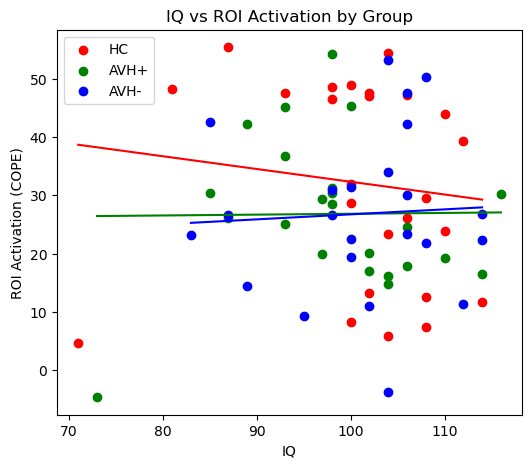

In [218]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(6, 5))

groups = {
    "HC": "red",
    "AVH+": "green",
    "AVH-": "blue"
}

for g, color in groups.items():
    subset = merged3_audit[merged3_audit["group"] == g].copy()

    # force numeric and drop bad rows
    subset["iq"] = pd.to_numeric(subset["iq"], errors="coerce")
    subset["roi_activation"] = pd.to_numeric(subset["roi_activation"], errors="coerce")
    subset = subset.replace([np.inf, -np.inf], np.nan).dropna(subset=["iq", "roi_activation"])

    # scatter (only valid points)
    plt.scatter(
        subset["iq"],
        subset["roi_activation"],
        label=g,
        color=color
    )

    # regression line (need at least 2 unique x values)
    if len(subset) >= 2 and subset["iq"].nunique() >= 2:
        x = subset["iq"].to_numpy()
        y = subset["roi_activation"].to_numpy()

        m, b = np.polyfit(x, y, 1)
        xs = np.linspace(x.min(), x.max(), 100)
        plt.plot(xs, m*xs + b, color=color)

plt.xlabel("IQ")
plt.ylabel("ROI Activation (COPE)")
plt.title("IQ vs ROI Activation by Group")
plt.legend()
plt.show()


In [219]:
from scipy.stats import pearsonr

for g in ["HC", "AVH+", "AVH-"]:
    sub = merged3_audit[merged3_audit["group"] == g]

    if len(sub) >= 3 and sub["iq"].nunique() >= 2:
        r, p = pearsonr(sub["iq"], sub["roi_activation"])
        print(f"{g}: r = {r:.3f}, p = {p:.4g}, n = {len(sub)}")
    else:
        print(f"{g}: not enough valid data")


HC: r = -0.123, p = 0.558, n = 25
AVH+: r = 0.011, p = 0.9602, n = 23
AVH-: r = 0.053, p = 0.8091, n = 23


In [220]:
from scipy.stats import spearmanr
import pandas as pd
import numpy as np

# clean once
df1 = merged3_audit.copy()
df1["iq"] = pd.to_numeric(df1["iq"], errors="coerce")
df1["roi_activation"] = pd.to_numeric(df1["roi_activation"], errors="coerce")
df1 = df1.replace([np.inf, -np.inf], np.nan).dropna(subset=["iq", "roi_activation"])

for g in ["HC", "AVH+", "AVH-"]:
    sub = df1[df1["group"] == g]

    if len(sub) >= 3 and sub["iq"].nunique() >= 2:
        r, p = spearmanr(sub["iq"], sub["roi_activation"])
        print(f"{g}: Spearman r = {r:.3f}, p = {p:.4g}, n = {len(sub)}")
    else:
        print(f"{g}: not enough valid data (n = {len(sub)})")


HC: Spearman r = -0.346, p = 0.09033, n = 25
AVH+: Spearman r = -0.356, p = 0.09563, n = 23
AVH-: Spearman r = 0.089, p = 0.6867, n = 23


# Contrast 1 (PE not COPE, auditory cortex)

In [224]:
import pandas as pd

participants = pd.read_csv("participants.csv")
roi1_audit_pe = pd.read_csv(
    "roi_activation_pe1_auditory.csv",
    header=None,
    names=["participant_id", "roi_activation"]
)

merged1_audit_pe = participants.merge(
    roi1_audit_pe,
    on="participant_id",
    how="inner"
)

merged1_audit_pe.to_csv("merged1_audit_pe.csv", index=False)

print(merged1_audit_pe.head())

  participant_id  age     sex   iq group  psyrats  roi_activation
0         sub-01   47    male   81    HC      NaN       27.329046
1         sub-02   36    male  104    HC      NaN       12.874095
2         sub-03   43    male  108    HC      NaN       12.870148
3         sub-04   25    male  106    HC      NaN       65.171714
4         sub-05   52  female  102    HC      NaN       18.781408


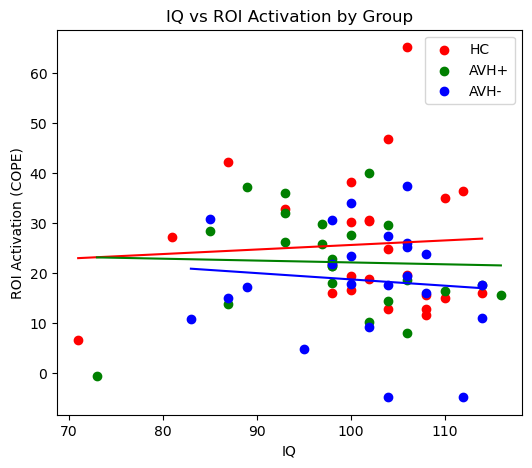

In [225]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(6, 5))

groups = {
    "HC": "red",
    "AVH+": "green",
    "AVH-": "blue"
}

for g, color in groups.items():
    subset = merged1_audit_pe[merged1_audit_pe["group"] == g].copy()

    # force numeric and drop bad rows
    subset["iq"] = pd.to_numeric(subset["iq"], errors="coerce")
    subset["roi_activation"] = pd.to_numeric(subset["roi_activation"], errors="coerce")
    subset = subset.replace([np.inf, -np.inf], np.nan).dropna(subset=["iq", "roi_activation"])

    # scatter (only valid points)
    plt.scatter(
        subset["iq"],
        subset["roi_activation"],
        label=g,
        color=color
    )

    # regression line (need at least 2 unique x values)
    if len(subset) >= 2 and subset["iq"].nunique() >= 2:
        x = subset["iq"].to_numpy()
        y = subset["roi_activation"].to_numpy()

        m, b = np.polyfit(x, y, 1)
        xs = np.linspace(x.min(), x.max(), 100)
        plt.plot(xs, m*xs + b, color=color)

plt.xlabel("IQ")
plt.ylabel("ROI Activation (COPE)")
plt.title("IQ vs ROI Activation by Group")
plt.legend()
plt.show()


In [226]:
from scipy.stats import pearsonr

for g in ["HC", "AVH+", "AVH-"]:
    sub = merged1_audit_pe[merged1_audit_pe["group"] == g]

    if len(sub) >= 3 and sub["iq"].nunique() >= 2:
        r, p = pearsonr(sub["iq"], sub["roi_activation"])
        print(f"{g}: r = {r:.3f}, p = {p:.4g}, n = {len(sub)}")
    else:
        print(f"{g}: not enough valid data")


HC: r = 0.066, p = 0.7537, n = 25
AVH+: r = -0.036, p = 0.8696, n = 23
AVH-: r = -0.100, p = 0.6509, n = 23


# Contrast 2

In [227]:
import pandas as pd

participants = pd.read_csv("participants.csv")
roi2_audit_pe = pd.read_csv(
    "roi_activation_pe2_auditory.csv",
    header=None,
    names=["participant_id", "roi_activation"]
)

merged2_audit_pe = participants.merge(
    roi2_audit_pe,
    on="participant_id",
    how="inner"
)

merged2_audit_pe.to_csv("merged2_audit_pe.csv", index=False)

print(merged2_audit_pe.head())

  participant_id  age     sex   iq group  psyrats  roi_activation
0         sub-01   47    male   81    HC      NaN       35.927392
1         sub-02   36    male  104    HC      NaN       11.575194
2         sub-03   43    male  108    HC      NaN       -5.600983
3         sub-04   25    male  106    HC      NaN       31.250395
4         sub-05   52  female  102    HC      NaN       17.911165


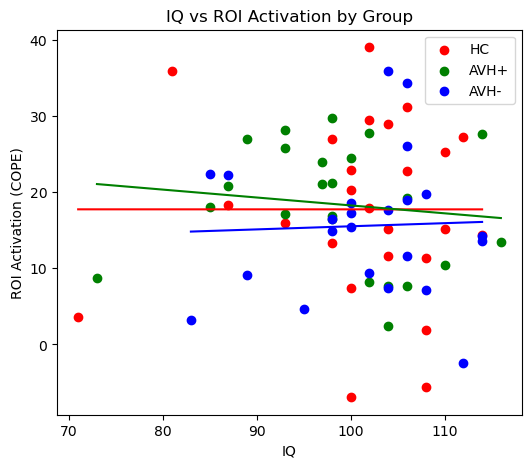

In [228]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(6, 5))

groups = {
    "HC": "red",
    "AVH+": "green",
    "AVH-": "blue"
}

for g, color in groups.items():
    subset = merged2_audit_pe[merged2_audit_pe["group"] == g].copy()

    # force numeric and drop bad rows
    subset["iq"] = pd.to_numeric(subset["iq"], errors="coerce")
    subset["roi_activation"] = pd.to_numeric(subset["roi_activation"], errors="coerce")
    subset = subset.replace([np.inf, -np.inf], np.nan).dropna(subset=["iq", "roi_activation"])

    # scatter (only valid points)
    plt.scatter(
        subset["iq"],
        subset["roi_activation"],
        label=g,
        color=color
    )

    # regression line (need at least 2 unique x values)
    if len(subset) >= 2 and subset["iq"].nunique() >= 2:
        x = subset["iq"].to_numpy()
        y = subset["roi_activation"].to_numpy()

        m, b = np.polyfit(x, y, 1)
        xs = np.linspace(x.min(), x.max(), 100)
        plt.plot(xs, m*xs + b, color=color)

plt.xlabel("IQ")
plt.ylabel("ROI Activation (COPE)")
plt.title("IQ vs ROI Activation by Group")
plt.legend()
plt.show()


In [229]:
from scipy.stats import pearsonr

for g in ["HC", "AVH+", "AVH-"]:
    sub = merged2_audit_pe[merged2_audit_pe["group"] == g]

    if len(sub) >= 3 and sub["iq"].nunique() >= 2:
        r, p = pearsonr(sub["iq"], sub["roi_activation"])
        print(f"{g}: r = {r:.3f}, p = {p:.4g}, n = {len(sub)}")
    else:
        print(f"{g}: not enough valid data")


HC: r = -0.000, p = 0.9996, n = 25
AVH+: r = -0.125, p = 0.5693, n = 23
AVH-: r = 0.039, p = 0.8607, n = 23


# Contrast 3

In [230]:
import pandas as pd

participants = pd.read_csv("participants.csv")
roi3_audit_pe = pd.read_csv(
    "roi_activation_pe3_auditory.csv",
    header=None,
    names=["participant_id", "roi_activation"]
)

merged3_audit_pe = participants.merge(
    roi3_audit_pe,
    on="participant_id",
    how="inner"
)

merged3_audit_pe.to_csv("merged3_audit_pe.csv", index=False)

print(merged3_audit_pe.head())

  participant_id  age     sex   iq group  psyrats  roi_activation
0         sub-01   47    male   81    HC      NaN       38.096442
1         sub-02   36    male  104    HC      NaN        1.317803
2         sub-03   43    male  108    HC      NaN        9.769820
3         sub-04   25    male  106    HC      NaN       35.231664
4         sub-05   52  female  102    HC      NaN       13.928362


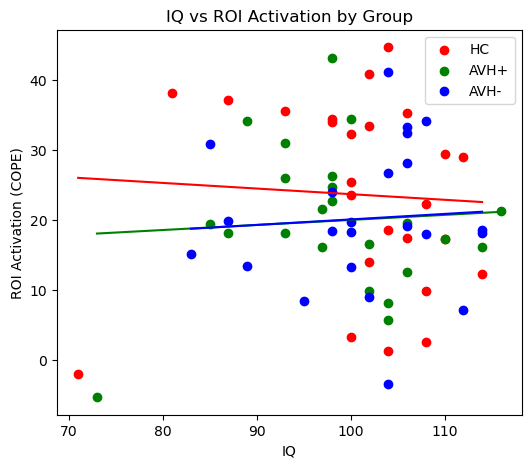

In [231]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(6, 5))

groups = {
    "HC": "red",
    "AVH+": "green",
    "AVH-": "blue"
}

for g, color in groups.items():
    subset = merged3_audit_pe[merged3_audit_pe["group"] == g].copy()

    # force numeric and drop bad rows
    subset["iq"] = pd.to_numeric(subset["iq"], errors="coerce")
    subset["roi_activation"] = pd.to_numeric(subset["roi_activation"], errors="coerce")
    subset = subset.replace([np.inf, -np.inf], np.nan).dropna(subset=["iq", "roi_activation"])

    # scatter (only valid points)
    plt.scatter(
        subset["iq"],
        subset["roi_activation"],
        label=g,
        color=color
    )

    # regression line (need at least 2 unique x values)
    if len(subset) >= 2 and subset["iq"].nunique() >= 2:
        x = subset["iq"].to_numpy()
        y = subset["roi_activation"].to_numpy()

        m, b = np.polyfit(x, y, 1)
        xs = np.linspace(x.min(), x.max(), 100)
        plt.plot(xs, m*xs + b, color=color)

plt.xlabel("IQ")
plt.ylabel("ROI Activation (COPE)")
plt.title("IQ vs ROI Activation by Group")
plt.legend()
plt.show()


In [232]:
from scipy.stats import pearsonr

for g in ["HC", "AVH+", "AVH-"]:
    sub = merged3_audit_pe[merged3_audit_pe["group"] == g]

    if len(sub) >= 3 and sub["iq"].nunique() >= 2:
        r, p = pearsonr(sub["iq"], sub["roi_activation"])
        print(f"{g}: r = {r:.3f}, p = {p:.4g}, n = {len(sub)}")
    else:
        print(f"{g}: not enough valid data")


HC: r = -0.058, p = 0.7848, n = 25
AVH+: r = 0.067, p = 0.7623, n = 23
AVH-: r = 0.066, p = 0.7633, n = 23


# Contrast 1 (sup temp gyrus) posterior

In [233]:
import pandas as pd

participants = pd.read_csv("participants.csv")
roi_sup_temp_gy1 = pd.read_csv(
    "roi_activation_sup_temp_gyrus1.csv",
    header=None,
    names=["participant_id", "roi_activation"]
)

merged_roi_sup_temp_gy1 = participants.merge(
    roi_sup_temp_gy1,
    on="participant_id",
    how="inner"
)

merged_roi_sup_temp_gy1.to_csv("merged_roi_sup_temp_gy1.csv", index=False)

print(merged_roi_sup_temp_gy1.head())

  participant_id  age     sex   iq group  psyrats  roi_activation
0         sub-01   47    male   81    HC      NaN       55.344290
1         sub-02   36    male  104    HC      NaN       20.900204
2         sub-03   43    male  108    HC      NaN       16.198491
3         sub-04   25    male  106    HC      NaN       80.390603
4         sub-05   52  female  102    HC      NaN       37.103861


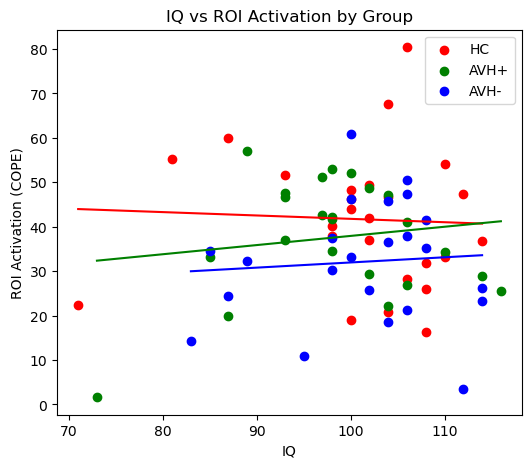

In [234]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(6, 5))

groups = {
    "HC": "red",
    "AVH+": "green",
    "AVH-": "blue"
}

for g, color in groups.items():
    subset = merged_roi_sup_temp_gy1[merged_roi_sup_temp_gy1["group"] == g].copy()

    # force numeric and drop bad rows
    subset["iq"] = pd.to_numeric(subset["iq"], errors="coerce")
    subset["roi_activation"] = pd.to_numeric(subset["roi_activation"], errors="coerce")
    subset = subset.replace([np.inf, -np.inf], np.nan).dropna(subset=["iq", "roi_activation"])

    # scatter (only valid points)
    plt.scatter(
        subset["iq"],
        subset["roi_activation"],
        label=g,
        color=color
    )

    # regression line (need at least 2 unique x values)
    if len(subset) >= 2 and subset["iq"].nunique() >= 2:
        x = subset["iq"].to_numpy()
        y = subset["roi_activation"].to_numpy()

        m, b = np.polyfit(x, y, 1)
        xs = np.linspace(x.min(), x.max(), 100)
        plt.plot(xs, m*xs + b, color=color)

plt.xlabel("IQ")
plt.ylabel("ROI Activation (COPE)")
plt.title("IQ vs ROI Activation by Group")
plt.legend()
plt.show()


In [235]:
from scipy.stats import pearsonr

for g in ["HC", "AVH+", "AVH-"]:
    sub = merged_roi_sup_temp_gy1[merged_roi_sup_temp_gy1["group"] == g]

    if len(sub) >= 3 and sub["iq"].nunique() >= 2:
        r, p = pearsonr(sub["iq"], sub["roi_activation"])
        print(f"{g}: r = {r:.3f}, p = {p:.4g}, n = {len(sub)}")
    else:
        print(f"{g}: not enough valid data")


HC: r = -0.048, p = 0.8214, n = 25
AVH+: r = 0.151, p = 0.4907, n = 23
AVH-: r = 0.074, p = 0.7358, n = 23


# Contrast 2 (sup temp gyrus)

In [236]:
import pandas as pd

participants = pd.read_csv("participants.csv")
roi_sup_temp_gy2 = pd.read_csv(
    "roi_activation_sup_temp_gyrus2.csv",
    header=None,
    names=["participant_id", "roi_activation"]
)

merged_roi_sup_temp_gy2 = participants.merge(
    roi_sup_temp_gy2,
    on="participant_id",
    how="inner"
)

merged_roi_sup_temp_gy2.to_csv("merged_roi_sup_temp_gy2.csv", index=False)

print(merged_roi_sup_temp_gy2.head())

  participant_id  age     sex   iq group  psyrats  roi_activation
0         sub-01   47    male   81    HC      NaN       56.221793
1         sub-02   36    male  104    HC      NaN       18.885579
2         sub-03   43    male  108    HC      NaN        1.509099
3         sub-04   25    male  106    HC      NaN       46.328554
4         sub-05   52  female  102    HC      NaN       35.222153


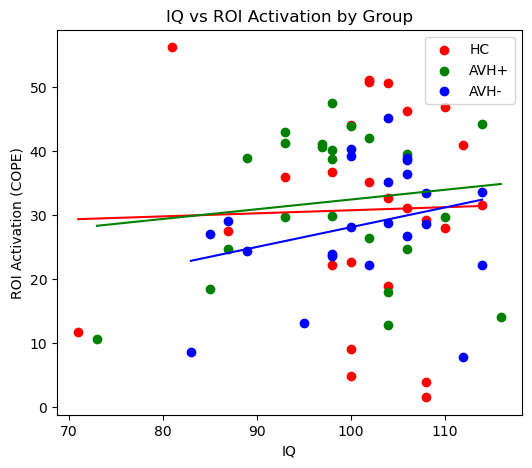

In [237]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(6, 5))

groups = {
    "HC": "red",
    "AVH+": "green",
    "AVH-": "blue"
}

for g, color in groups.items():
    subset = merged_roi_sup_temp_gy2[merged_roi_sup_temp_gy2["group"] == g].copy()

    # force numeric and drop bad rows
    subset["iq"] = pd.to_numeric(subset["iq"], errors="coerce")
    subset["roi_activation"] = pd.to_numeric(subset["roi_activation"], errors="coerce")
    subset = subset.replace([np.inf, -np.inf], np.nan).dropna(subset=["iq", "roi_activation"])

    # scatter (only valid points)
    plt.scatter(
        subset["iq"],
        subset["roi_activation"],
        label=g,
        color=color
    )

    # regression line (need at least 2 unique x values)
    if len(subset) >= 2 and subset["iq"].nunique() >= 2:
        x = subset["iq"].to_numpy()
        y = subset["roi_activation"].to_numpy()

        m, b = np.polyfit(x, y, 1)
        xs = np.linspace(x.min(), x.max(), 100)
        plt.plot(xs, m*xs + b, color=color)

plt.xlabel("IQ")
plt.ylabel("ROI Activation (COPE)")
plt.title("IQ vs ROI Activation by Group")
plt.legend()
plt.show()


In [238]:
from scipy.stats import pearsonr

for g in ["HC", "AVH+", "AVH-"]:
    sub = merged_roi_sup_temp_gy2[merged_roi_sup_temp_gy2["group"] == g]

    if len(sub) >= 3 and sub["iq"].nunique() >= 2:
        r, p = pearsonr(sub["iq"], sub["roi_activation"])
        print(f"{g}: r = {r:.3f}, p = {p:.4g}, n = {len(sub)}")
    else:
        print(f"{g}: not enough valid data")


HC: r = 0.029, p = 0.8899, n = 25
AVH+: r = 0.127, p = 0.5626, n = 23
AVH-: r = 0.273, p = 0.2068, n = 23


# Contrast 3 (sup temp gyrus)

In [239]:
import pandas as pd

participants = pd.read_csv("participants.csv")
roi_sup_temp_gy3 = pd.read_csv(
    "roi_activation_sup_temp_gyrus3.csv",
    header=None,
    names=["participant_id", "roi_activation"]
)

merged_roi_sup_temp_gy3 = participants.merge(
    roi_sup_temp_gy3,
    on="participant_id",
    how="inner"
)

merged_roi_sup_temp_gy3.to_csv("merged_roi_sup_temp_gy3.csv", index=False)

print(merged_roi_sup_temp_gy3.head())

  participant_id  age     sex   iq group  psyrats  roi_activation
0         sub-01   47    male   81    HC      NaN       58.097527
1         sub-02   36    male  104    HC      NaN        2.648686
2         sub-03   43    male  108    HC      NaN       17.424759
3         sub-04   25    male  106    HC      NaN       42.252139
4         sub-05   52  female  102    HC      NaN       33.024609


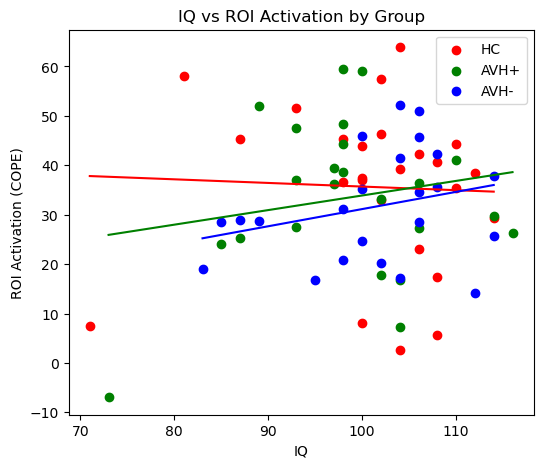

In [240]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(6, 5))

groups = {
    "HC": "red",
    "AVH+": "green",
    "AVH-": "blue"
}

for g, color in groups.items():
    subset = merged_roi_sup_temp_gy3[merged_roi_sup_temp_gy3["group"] == g].copy()

    # force numeric and drop bad rows
    subset["iq"] = pd.to_numeric(subset["iq"], errors="coerce")
    subset["roi_activation"] = pd.to_numeric(subset["roi_activation"], errors="coerce")
    subset = subset.replace([np.inf, -np.inf], np.nan).dropna(subset=["iq", "roi_activation"])

    # scatter (only valid points)
    plt.scatter(
        subset["iq"],
        subset["roi_activation"],
        label=g,
        color=color
    )

    # regression line (need at least 2 unique x values)
    if len(subset) >= 2 and subset["iq"].nunique() >= 2:
        x = subset["iq"].to_numpy()
        y = subset["roi_activation"].to_numpy()

        m, b = np.polyfit(x, y, 1)
        xs = np.linspace(x.min(), x.max(), 100)
        plt.plot(xs, m*xs + b, color=color)

plt.xlabel("IQ")
plt.ylabel("ROI Activation (COPE)")
plt.title("IQ vs ROI Activation by Group")
plt.legend()
plt.show()


In [241]:
from scipy.stats import pearsonr

for g in ["HC", "AVH+", "AVH-"]:
    sub = merged_roi_sup_temp_gy3[merged_roi_sup_temp_gy3["group"] == g]

    if len(sub) >= 3 and sub["iq"].nunique() >= 2:
        r, p = pearsonr(sub["iq"], sub["roi_activation"])
        print(f"{g}: r = {r:.3f}, p = {p:.4g}, n = {len(sub)}")
    else:
        print(f"{g}: not enough valid data")


HC: r = -0.043, p = 0.8392, n = 25
AVH+: r = 0.179, p = 0.4128, n = 23
AVH-: r = 0.270, p = 0.212, n = 23


# Contrast 1 (sup temp gyrus) anterior

In [245]:
import pandas as pd

participants = pd.read_csv("participants.csv")
roi_sup_temp_gy_ant1 = pd.read_csv(
    "roi_activation_sup_temp_gyrus_ant1.csv",
    header=None,
    names=["participant_id", "roi_activation"]
)

merged_roi_sup_temp_gy_ant1 = participants.merge(
    roi_sup_temp_gy_ant1,
    on="participant_id",
    how="inner"
)

merged_roi_sup_temp_gy_ant1.to_csv("merged_roi_sup_temp_gy_ant1.csv", index=False)

print(merged_roi_sup_temp_gy_ant1.head())

  participant_id  age     sex   iq group  psyrats  roi_activation
0         sub-01   47    male   81    HC      NaN       50.862470
1         sub-02   36    male  104    HC      NaN       21.829856
2         sub-03   43    male  108    HC      NaN       24.849845
3         sub-04   25    male  106    HC      NaN       72.421386
4         sub-05   52  female  102    HC      NaN       36.356345


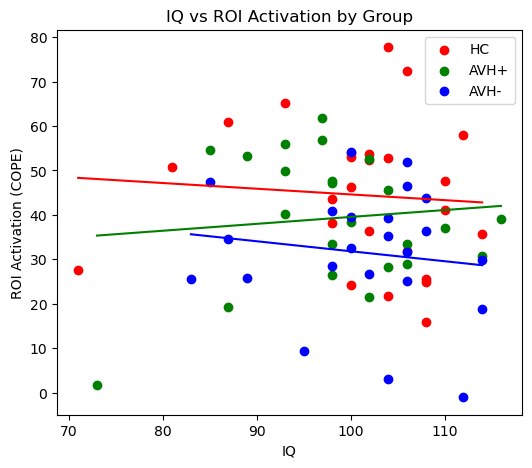

In [246]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(6, 5))

groups = {
    "HC": "red",
    "AVH+": "green",
    "AVH-": "blue"
}

for g, color in groups.items():
    subset = merged_roi_sup_temp_gy_ant1[merged_roi_sup_temp_gy_ant1["group"] == g].copy()

    # force numeric and drop bad rows
    subset["iq"] = pd.to_numeric(subset["iq"], errors="coerce")
    subset["roi_activation"] = pd.to_numeric(subset["roi_activation"], errors="coerce")
    subset = subset.replace([np.inf, -np.inf], np.nan).dropna(subset=["iq", "roi_activation"])

    # scatter (only valid points)
    plt.scatter(
        subset["iq"],
        subset["roi_activation"],
        label=g,
        color=color
    )

    # regression line (need at least 2 unique x values)
    if len(subset) >= 2 and subset["iq"].nunique() >= 2:
        x = subset["iq"].to_numpy()
        y = subset["roi_activation"].to_numpy()

        m, b = np.polyfit(x, y, 1)
        xs = np.linspace(x.min(), x.max(), 100)
        plt.plot(xs, m*xs + b, color=color)

plt.xlabel("IQ")
plt.ylabel("ROI Activation (COPE)")
plt.title("IQ vs ROI Activation by Group")
plt.legend()
plt.show()


In [ ]:
from scipy.stats import pearsonr

for g in ["HC", "AVH+", "AVH-"]:
    sub = merged_roi_sup_temp_gy_ant1[merged_roi_sup_temp_gy_ant1["group"] == g]

    if len(sub) >= 3 and sub["iq"].nunique() >= 2:
        r, p = pearsonr(sub["iq"], sub["roi_activation"])
        print(f"{g}: r = {r:.3f}, p = {p:.4g}, n = {len(sub)}")
    else:
        print(f"{g}: not enough valid data")


HC: r = -0.077, p = 0.7154, n = 25
AVH+: r = 0.102, p = 0.6419, n = 23
AVH-: r = -0.137, p = 0.5333, n = 23


# Contrast 2 (sup temp gyrus) anterior

In [248]:
import pandas as pd

participants = pd.read_csv("participants.csv")
roi_sup_temp_gy_ant2 = pd.read_csv(
    "roi_activation_sup_temp_gyrus_ant2.csv",
    header=None,
    names=["participant_id", "roi_activation"]
)

merged_roi_sup_temp_gy_ant2 = participants.merge(
    roi_sup_temp_gy_ant2,
    on="participant_id",
    how="inner"
)

merged_roi_sup_temp_gy_ant2.to_csv("merged_roi_sup_temp_gy_ant2.csv", index=False)

print(merged_roi_sup_temp_gy_ant2.head())

  participant_id  age     sex   iq group  psyrats  roi_activation
0         sub-01   47    male   81    HC      NaN       56.373629
1         sub-02   36    male  104    HC      NaN       19.604410
2         sub-03   43    male  108    HC      NaN        4.200446
3         sub-04   25    male  106    HC      NaN       47.024307
4         sub-05   52  female  102    HC      NaN       30.277906


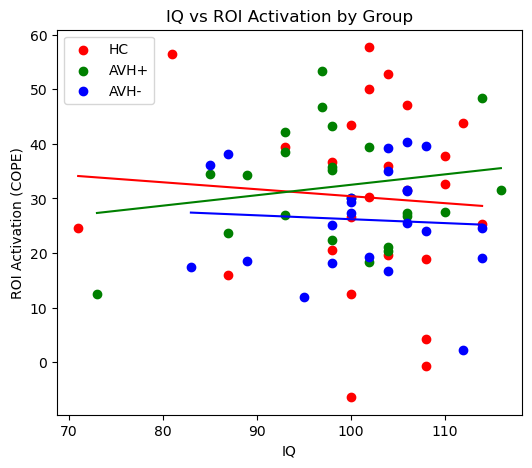

In [249]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(6, 5))

groups = {
    "HC": "red",
    "AVH+": "green",
    "AVH-": "blue"
}

for g, color in groups.items():
    subset = merged_roi_sup_temp_gy_ant2[merged_roi_sup_temp_gy_ant2["group"] == g].copy()

    # force numeric and drop bad rows
    subset["iq"] = pd.to_numeric(subset["iq"], errors="coerce")
    subset["roi_activation"] = pd.to_numeric(subset["roi_activation"], errors="coerce")
    subset = subset.replace([np.inf, -np.inf], np.nan).dropna(subset=["iq", "roi_activation"])

    # scatter (only valid points)
    plt.scatter(
        subset["iq"],
        subset["roi_activation"],
        label=g,
        color=color
    )

    # regression line (need at least 2 unique x values)
    if len(subset) >= 2 and subset["iq"].nunique() >= 2:
        x = subset["iq"].to_numpy()
        y = subset["roi_activation"].to_numpy()

        m, b = np.polyfit(x, y, 1)
        xs = np.linspace(x.min(), x.max(), 100)
        plt.plot(xs, m*xs + b, color=color)

plt.xlabel("IQ")
plt.ylabel("ROI Activation (COPE)")
plt.title("IQ vs ROI Activation by Group")
plt.legend()
plt.show()


In [250]:
from scipy.stats import pearsonr

for g in ["HC", "AVH+", "AVH-"]:
    sub = merged_roi_sup_temp_gy_ant2[merged_roi_sup_temp_gy_ant2["group"] == g]

    if len(sub) >= 3 and sub["iq"].nunique() >= 2:
        r, p = pearsonr(sub["iq"], sub["roi_activation"])
        print(f"{g}: r = {r:.3f}, p = {p:.4g}, n = {len(sub)}")
    else:
        print(f"{g}: not enough valid data")


HC: r = -0.072, p = 0.733, n = 25
AVH+: r = 0.176, p = 0.4209, n = 23
AVH-: r = -0.063, p = 0.7755, n = 23


# Contrast 3 (sup temp gyrus) anterior

In [251]:
import pandas as pd

participants = pd.read_csv("participants.csv")
roi_sup_temp_gy_ant3 = pd.read_csv(
    "roi_activation_sup_temp_gyrus_ant3.csv",
    header=None,
    names=["participant_id", "roi_activation"]
)

merged_roi_sup_temp_gy_ant3 = participants.merge(
    roi_sup_temp_gy_ant3,
    on="participant_id",
    how="inner"
)

merged_roi_sup_temp_gy_ant3.to_csv("merged_roi_sup_temp_gy_ant3.csv", index=False)

print(merged_roi_sup_temp_gy_ant3.head())

  participant_id  age     sex   iq group  psyrats  roi_activation
0         sub-01   47    male   81    HC      NaN       62.369175
1         sub-02   36    male  104    HC      NaN        2.684662
2         sub-03   43    male  108    HC      NaN       17.486576
3         sub-04   25    male  106    HC      NaN       47.495898
4         sub-05   52  female  102    HC      NaN       27.719422


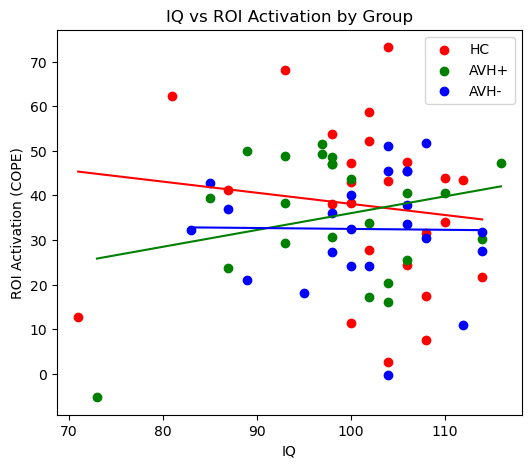

In [252]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(6, 5))

groups = {
    "HC": "red",
    "AVH+": "green",
    "AVH-": "blue"
}

for g, color in groups.items():
    subset = merged_roi_sup_temp_gy_ant3[merged_roi_sup_temp_gy_ant3["group"] == g].copy()

    # force numeric and drop bad rows
    subset["iq"] = pd.to_numeric(subset["iq"], errors="coerce")
    subset["roi_activation"] = pd.to_numeric(subset["roi_activation"], errors="coerce")
    subset = subset.replace([np.inf, -np.inf], np.nan).dropna(subset=["iq", "roi_activation"])

    # scatter (only valid points)
    plt.scatter(
        subset["iq"],
        subset["roi_activation"],
        label=g,
        color=color
    )

    # regression line (need at least 2 unique x values)
    if len(subset) >= 2 and subset["iq"].nunique() >= 2:
        x = subset["iq"].to_numpy()
        y = subset["roi_activation"].to_numpy()

        m, b = np.polyfit(x, y, 1)
        xs = np.linspace(x.min(), x.max(), 100)
        plt.plot(xs, m*xs + b, color=color)

plt.xlabel("IQ")
plt.ylabel("ROI Activation (COPE)")
plt.title("IQ vs ROI Activation by Group")
plt.legend()
plt.show()


In [253]:
from scipy.stats import pearsonr

for g in ["HC", "AVH+", "AVH-"]:
    sub = merged_roi_sup_temp_gy_ant3[merged_roi_sup_temp_gy_ant3["group"] == g]

    if len(sub) >= 3 and sub["iq"].nunique() >= 2:
        r, p = pearsonr(sub["iq"], sub["roi_activation"])
        print(f"{g}: r = {r:.3f}, p = {p:.4g}, n = {len(sub)}")
    else:
        print(f"{g}: not enough valid data")


HC: r = -0.129, p = 0.5402, n = 25
AVH+: r = 0.253, p = 0.2433, n = 23
AVH-: r = -0.014, p = 0.9503, n = 23
